# Using KMeans for Image Segmentation

    - Image segmentation is one of the most important techniques in image processing. It is a pre-processing step in the area of image analysis, computer vision, and pattern recognition [1]. The process of dividing a digital image into multiple regions (sets of pixels) is called image segmentation.  Image segmentation is commonly used to determine objects and boundaries (lines, curves, etc.) in images. The result of image segmentation is a set of segments that include the entire image, or a set of contours extracted from the image (edge detection). All pixels in a region is related with respect to some features or computed property, such as color, intensity or texture [2]. Adjacent regions are significantly different with respect to the same characteristics. Some of applications of image segmentation are: digital libraries, imageprocessing, medical imaging, computer vision, face recognition, image and video retrieval etc. Above text taken from research paper available at https://www.researchgate.net/publication/321133921_Image_Segmentation_using_K-means_clustering_and_Thresholding
    
    - Good article available at https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

loaded image with shape  (296, 288, 3)


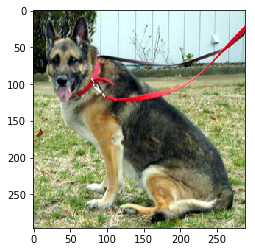

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline

#load image
image = imread(fname='dog.2491.jpg')

#print image shape
print ('loaded image with shape ', image.shape)

#show image
plt.imshow(image)


In [2]:
# reshape image data from Rank 3 tensor to a 2-D array
reshaped_image = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
print ('Shape of resized image is ', reshaped_image.shape)

Shape of resized image is  (85248, 3)


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import datetime

n_clusters = (2,5,10,20,250)
segmented_images = []
silhoutte_scores = []
inertia_scores = []

tic = datetime.datetime.now()

for i in (n_clusters):
    
    tic_cluster = datetime.datetime.now()
    kMean = KMeans(n_clusters=i, init='k-means++', n_init=2, random_state=42)
    model = kMean.fit(reshaped_image)
    segmented_img = model.cluster_centers_[model.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    segmented_images.append(segmented_img)
    
    #silhoutte_scores.append(silhouette_score(reshaped_image, model.labels_))
    inertia_scores.append(model.inertia_)

    toc_cluster = datetime.datetime.now()
    print ('Training completed for %d clusters in %s seconds'%(i,(toc_cluster-tic_cluster)))
    
toc = datetime.datetime.now()
print ('Clustering completed in %s seconds'%(toc-tic))

Training completed for 2 clusters in 0:00:00.215917 seconds
Training completed for 5 clusters in 0:00:00.523832 seconds
Training completed for 10 clusters in 0:00:02.055342 seconds
Training completed for 20 clusters in 0:00:03.459892 seconds
Training completed for 250 clusters in 0:01:23.797176 seconds
Clustering completed in 0:01:30.056159 seconds


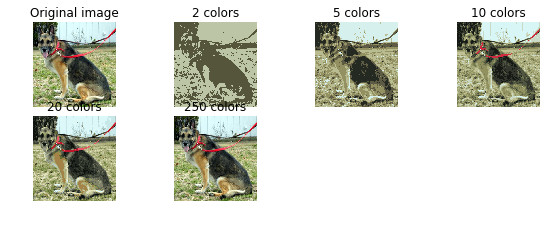

In [4]:
import numpy as np

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(341)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_cluster in enumerate(n_clusters):
    plt.subplot(342 + idx)
    segmented_images[idx] = np.clip(segmented_images[idx].astype('uint8'), 0, 255)
    reduced_image = (segmented_images[idx]).astype(np.uint8)
    plt.imshow(reduced_image)
    plt.title("{} colors".format(n_cluster))
    plt.axis('off')

plt.show()

# Review clustering performance

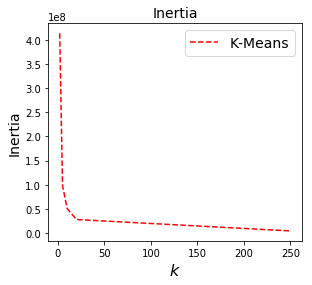

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(n_clusters, inertia_scores, "r--", label="K-Means")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)

plt.show()

# Summary

    - KMeans looks like a good approach to segment an image. For the above image, around 25 clusters the value of inertia seems to be narrowing down so that could be taken as optimal size of the clusters.